In [1]:
# average of time spent on each level 
# percentage of correct answers for each subject 
# percentage of each level correct ansers (how many ppl got the correct answer for each level )
# Compare fixation counts, fixation times, blinks, saccades, and performance between levels to confirm the intended increase in difficulty.
# Compare the eye-tracking metrics (fixation counts, times, blinks, saccades) between those who succeeded and those who failed each level 
     # compare eye data for correct vs wrong answers 

# Eye Metrics vs. Performance: Correlate fixation counts, fixation times, number of blinks, and saccades with performance (correct vs. incorrect) 
# to determine if certain eye behaviors are associated with success.
# Total Time vs. Performance: Analyze the correlation between the total time spent on a level and the performance to see if spending more time
# correlates with higher success rates.

# Success Prediction: Use machine learning models to predict whether a player will solve a level based on their eye-tracking data and time 
# spent on the level. Models like logistic regression, decision trees, or neural networks could be used.



In [2]:
# import libraris 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from IPython.display import Image, display , HTML
from scipy.stats import pearsonr


## Data Preprocessing

In [3]:
# read 
def read_and_preprocess(file_path):
    df = pd.read_csv(file_path , sep=';')
    df['total_time'] = df['total_time'].str.replace(',', '.').astype(float)
    df['a1_time'] = df['a1_time'].str.replace(',', '.').astype(float)
    df['a2_time'] = df['a2_time'].str.replace(',', '.').astype(float)
    df['a3_time'] = df['a3_time'].str.replace(',', '.').astype(float)
    df['a4_time'] = df['a4_time'].str.replace(',', '.').astype(float)
    df['saccades'] = df['saccades'].str.replace(',', '.').astype(float)
    return df

In [4]:
# add average fixation count and fixation duration of all objects
def add_average_fixations(df):
    # Compute the average fixation count across objects a1, a2, a3, a4
    df['average_fixation_count'] = df[['a1_count', 'a2_count', 'a3_count', 'a4_count']].mean(axis=1)
    
    # Compute the average fixation time across objects a1, a2, a3, a4
    df['average_fixation_time'] = df[['a1_time', 'a2_time', 'a3_time', 'a4_time']].mean(axis=1)

    df.loc[df['blinkes'] > 100, 'blinkes'] = df['blinkes'] / 10
    
    
    return df

In [5]:
#  read data 
# sub1 = read_and_preprocess('sub1.csv')
# sub2 = read_and_preprocess('sub2.csv')
sub3 = read_and_preprocess('sub3.csv')
sub4 = read_and_preprocess('sub4.csv')
sub5 = read_and_preprocess('sub5.csv')
sub6 = read_and_preprocess('sub6.csv')
sub7 = read_and_preprocess('sub7.csv')
sub8 = read_and_preprocess('sub8.csv')

sub3 = add_average_fixations(sub3)
sub4 = add_average_fixations(sub4)
sub5 = add_average_fixations(sub5)
sub6 = add_average_fixations(sub6)
sub7 = add_average_fixations(sub7)
sub8 = add_average_fixations(sub8)


In [6]:
sub4.head(16)
# sub2.head(16)
# sub3.head(16)
# sub4.head(16)

,level,a1_count,a2_count,a3_count,a4_count,a1_time,a2_time,a3_time,a4_time,blinkes,saccades,total_time,performance,average_fixation_count,average_fixation_time
0,Card1,4,5,2,1.0,0.067590,1.842936,0.012260,0.000000,5,3.349967,7.740119,1,3.000000,0.480697
1,Card2,5,24,31,8.0,0.050148,5.472565,8.068252,0.945564,50,10.390460,64.718120,0,17.000000,3.634132
2,Card3,3,4,2,3.0,0.714905,1.027336,0.580154,1.419995,10,4.985842,11.135870,0,3.000000,0.935598
3,Card4,1,2,2,2.0,0.000000,0.402206,0.871361,1.411625,10,1.675070,5.506935,1,1.750000,0.671298
4,Card5,3,3,5,2.0,0.324753,0.402412,0.703537,0.000000,10,6.134574,17.068260,0,3.250000,0.357676
5,Card6,1,3,2,1.0,0.000000,0.502861,0.137375,0.000000,5,0.443806,8.121780,0,1.750000,0.160059
6,Card7,1,5,6,3.0,0.000000,1.150452,1.462761,0.234703,20,15.750900,19.991690,1,3.750000,0.711979
7,Card8,1,4,1,1.0,0.000000,1.485992,0.000000,0.500759,10,3.970797,9.248703,0,1.750000,0.496688
8,Card9,9,12,10,1.0,1.010773,1.565277,1.066284,0.000000,40,52.034080,53.618550,0,8.000000,0.910583
9,Card10,1,3,3,NaN,0.000000,1.507950,0.513779,NaN,5,5.321233,7.768661,1,2.333333,0.673910


In [7]:
all_data = pd.concat([sub3, sub4,sub5,sub6,sub7,sub8], ignore_index=True)
level_mapping = {f'Card{i}': i for i in range(1, 16)}

# Add new column for integer level
all_data['level_int'] = all_data['level'].map(level_mapping)

all_data.head()

,level,a1_count,a2_count,a3_count,a4_count,a1_time,a2_time,a3_time,a4_time,blinkes,saccades,total_time,performance,average_fixation_count,average_fixation_time,level_int
0,Card1,6.0,5,5,2.0,1.800633,1.436949,1.284593,0.223796,5.0,405.575000,16.892370,1,4.50,1.186493,1
1,Card2,2.0,3,4,2.0,0.000000,1.217665,0.726368,0.212231,5.0,7.992357,9.896740,0,2.75,0.539066,2
2,Card3,1.0,2,4,3.0,0.000000,0.011154,0.234819,1.419995,5.0,0.000000,7.015276,1,2.50,0.416492,3
3,Card4,1.0,2,5,2.0,0.000000,0.301617,0.278748,1.411625,10.0,18.845260,7.115379,1,2.50,0.497997,4
4,Card5,1.0,3,5,2.0,0.000000,0.659092,0.571755,0.000000,35.0,7.653805,13.672460,1,2.75,0.307712,5


In [9]:

# Compute the average time spent on each level
average_time_per_level = all_data.groupby('level')['total_time'].mean()

# Display the result
print(average_time_per_level)

level
Card1     25.386225
Card10     9.903561
Card11    22.226291
Card12     7.205855
Card13     8.356435
Card14    12.826989
Card15    15.246878
Card2     28.084098
Card3     12.405794
Card4     13.857499
Card5     18.677395
Card6     16.556088
Card7     18.291011
Card8     14.441176
Card9     26.224391
Name: total_time, dtype: float64


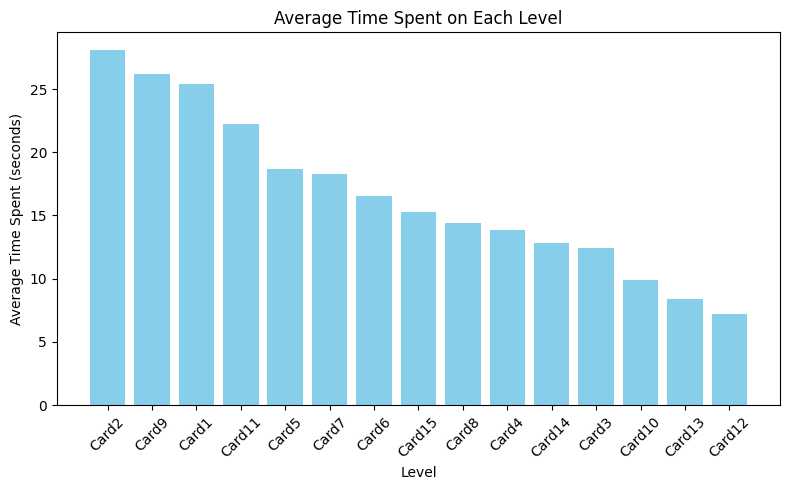

In [27]:
plt.figure(figsize=(8, 5))
plt.bar(average_time_per_level.index, average_time_per_level.values, color='skyblue')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Level')
plt.xticks(average_time_per_level.index, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

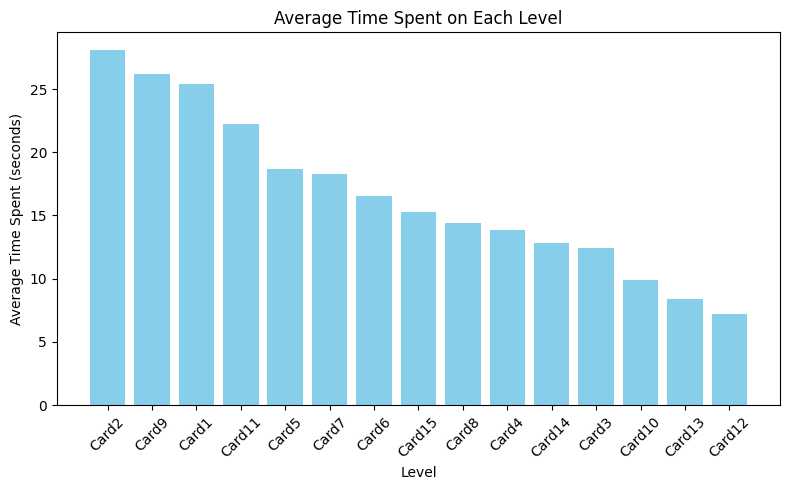

In [28]:
average_time_per_level = average_time_per_level.sort_values(ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(average_time_per_level.index, average_time_per_level.values, color='skyblue')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Level')
plt.xticks(average_time_per_level.index, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
html = f"""
<table>
    <tr>
        <td><img src="{'game_images/2.jpeg'}" alt="Image 2" style="width: 300px;"/></td>
        <td><img src="{'game_images/9.jpeg'}" alt="Image 9" style="width: 300px;"/></td>
        <td><img src="{'game_images/1.jpeg'}" alt="Image 2" style="width: 300px;"/></td>
        <td><img src="{'game_images/11.jpeg'}" alt="Image 9" style="width: 300px;"/></td>
        <td><img src="{'game_images/5.jpeg'}" alt="Image 2" style="width: 300px;"/></td>
    </tr>
</table>
"""
display(HTML(html))


,,,,


# Performance Analysis 

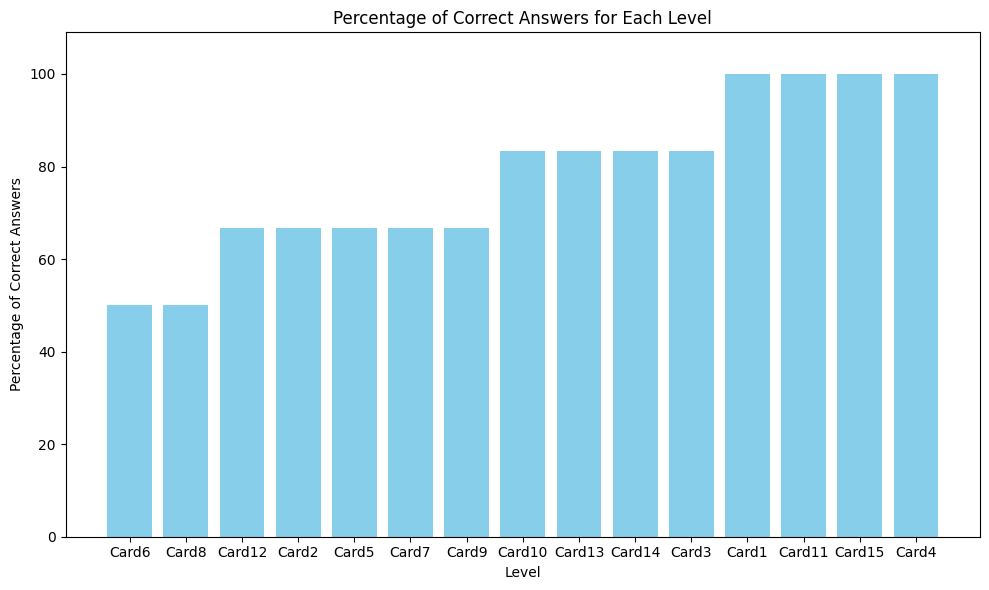

In [30]:
# Group by level and calculate the percentage of correct answers
level_correct_percentage = all_data.groupby('level')['performance'].mean() * 100

sorted_level_correct_percentage = level_correct_percentage.sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(sorted_level_correct_percentage.index, sorted_level_correct_percentage.values, color='skyblue')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Percentage of Correct Answers')
plt.title('Percentage of Correct Answers for Each Level')
plt.ylim(0, 109)  # Set the y-axis limit to 100

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
html = f"""
<table>
    <tr>
        <td><img src="{'game_images/1.jpeg'}" alt="Image 1" style="width: 300px;"/></td>
        <td><img src="{'game_images/11.jpeg'}" alt="Image 11" style="width: 300px;"/></td>
        <td><img src="{'game_images/15.jpeg'}" alt="Image 15" style="width: 300px;"/></td>
        <td><img src="{'game_images/4.jpeg'}" alt="Image 4" style="width: 300px;"/></td>
    </tr>
</table>
"""
display(HTML(html))


,,,


In [32]:
html = f"""
<table>
    <tr>
        <td><img src="{'game_images/6.jpeg'}" alt="Image 6" style="width: 300px;"/></td>
        <td><img src="{'game_images/8.jpeg'}" alt="Image 8" style="width: 300px;"/></td>
    </tr>
</table>
"""
display(HTML(html))

,


## Analyze fixation counts, fixation times, blinks, saccades, and performance across levels

In [33]:
level_analysis = all_data.groupby('level').mean()


In [34]:
# Group data by level and compute mean for each metric
level_analysis = all_data.groupby('level').mean()

# Sort the results in descending order for each metric
sorted_fixation_count = level_analysis['average_fixation_count'].sort_values(ascending=False)
sorted_fixation_time = level_analysis['average_fixation_time'].sort_values(ascending=False)
sorted_blinks = level_analysis['blinkes'].sort_values(ascending=False)
sorted_saccades = level_analysis['saccades'].sort_values(ascending=False)
sorted_performance = level_analysis['performance'].sort_values(ascending=False)
sorted_total_time = level_analysis['total_time'].sort_values(ascending=False)


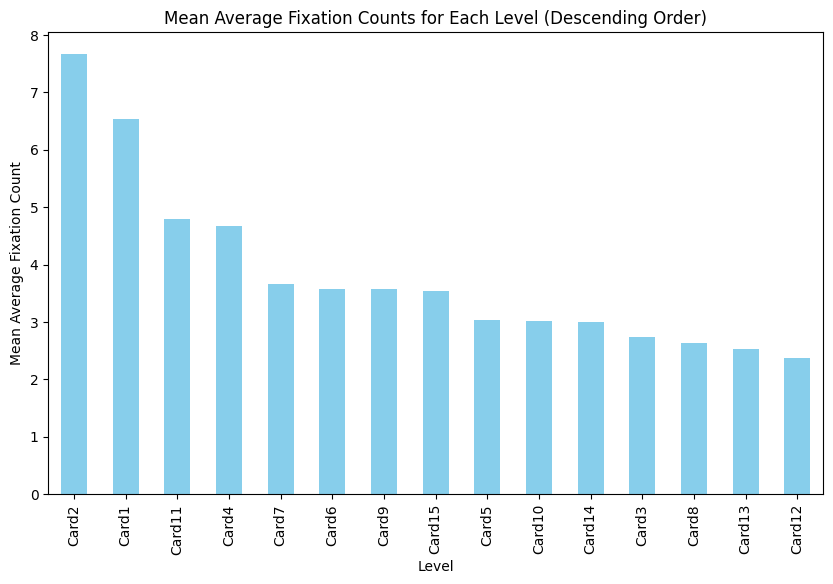

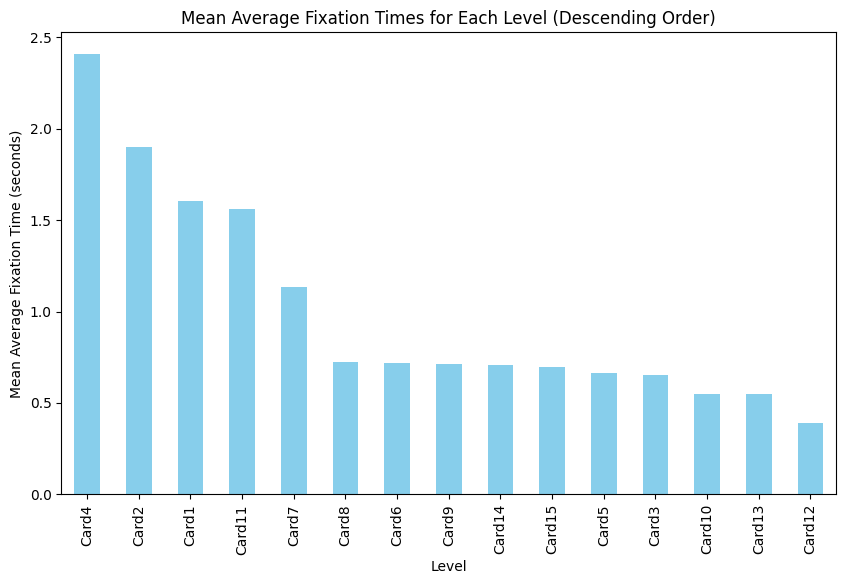

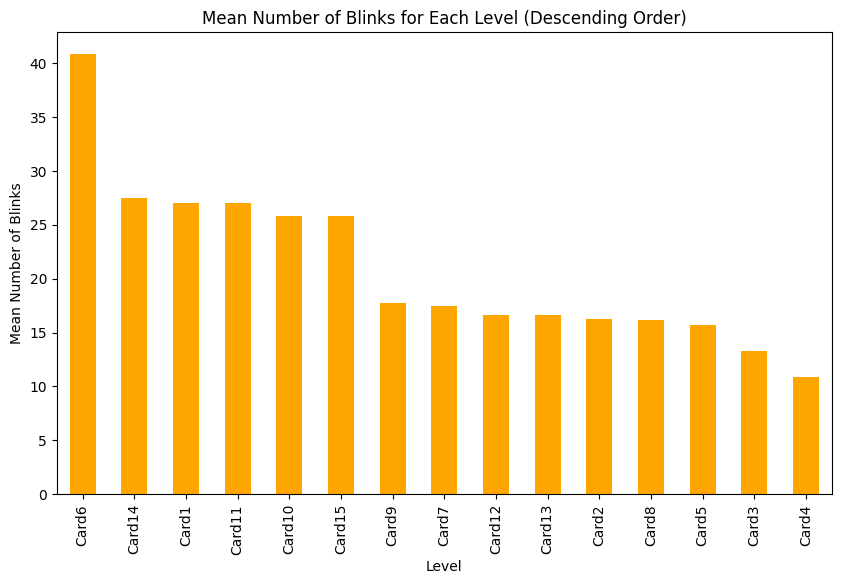

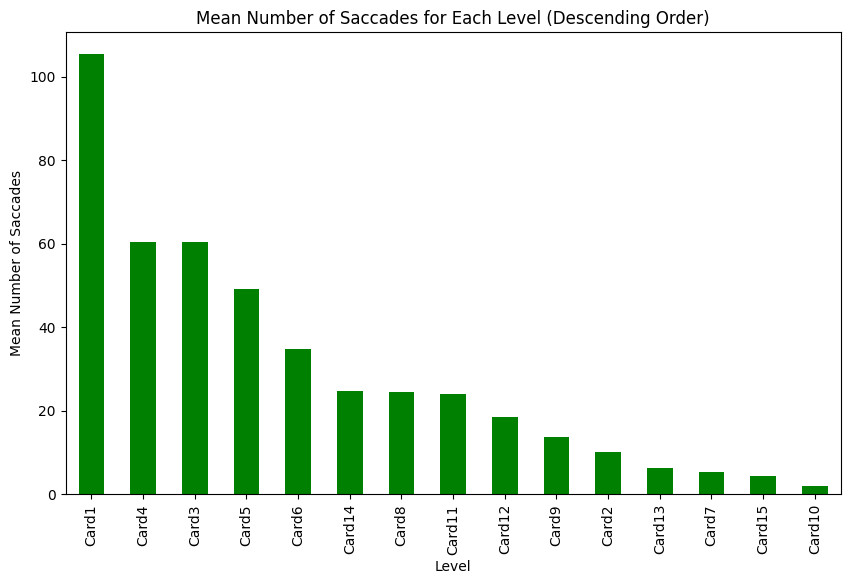

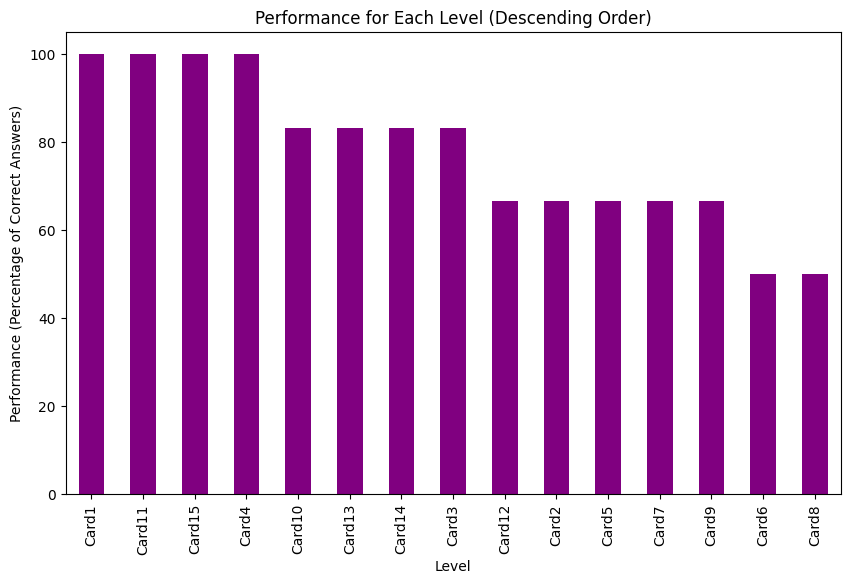

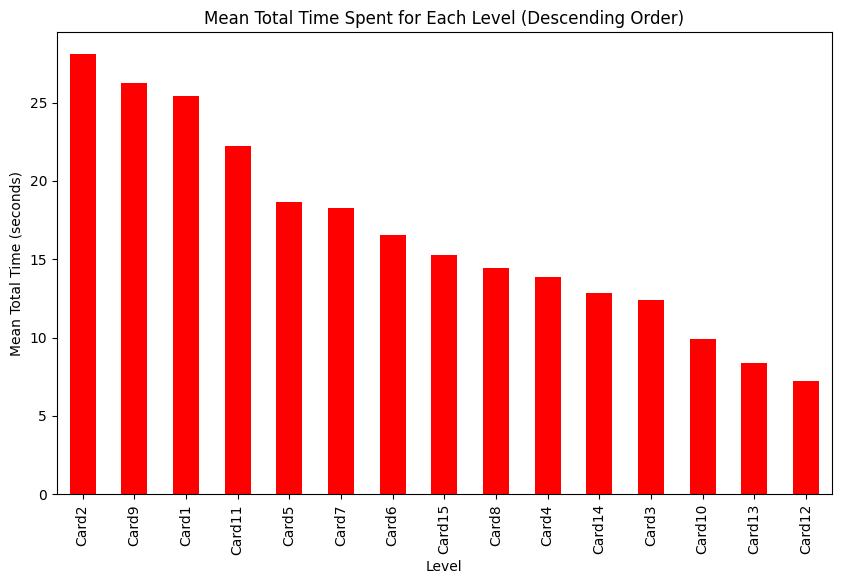

In [35]:

# Plot mean fixation counts for each level
plt.figure(figsize=(10, 6))
sorted_fixation_count.plot(kind='bar', color='skyblue')
plt.xlabel('Level')
plt.ylabel('Mean Average Fixation Count')
plt.title('Mean Average Fixation Counts for Each Level (Descending Order)')
plt.show()

# Plot mean fixation times for each level
plt.figure(figsize=(10, 6))
sorted_fixation_time.plot(kind='bar', color='skyblue')
plt.xlabel('Level')
plt.ylabel('Mean Average Fixation Time (seconds)')
plt.title('Mean Average Fixation Times for Each Level (Descending Order)')
plt.show()

# Plot mean blinks for each level
plt.figure(figsize=(10, 6))
sorted_blinks.plot(kind='bar', color='orange')
plt.xlabel('Level')
plt.ylabel('Mean Number of Blinks')
plt.title('Mean Number of Blinks for Each Level (Descending Order)')
plt.show()

# Plot mean saccades for each level
plt.figure(figsize=(10, 6))
sorted_saccades.plot(kind='bar', color='green')
plt.xlabel('Level')
plt.ylabel('Mean Number of Saccades')
plt.title('Mean Number of Saccades for Each Level (Descending Order)')
plt.show()

# Plot performance (percentage of correct answers) for each level
plt.figure(figsize=(10, 6))
(sorted_performance * 100).plot(kind='bar', color='purple')
plt.xlabel('Level')
plt.ylabel('Performance (Percentage of Correct Answers)')
plt.title('Performance for Each Level (Descending Order)')
plt.show()

# Plot mean total time spent for each level
plt.figure(figsize=(10, 6))
sorted_total_time.plot(kind='bar', color='red')
plt.xlabel('Level')
plt.ylabel('Mean Total Time (seconds)')
plt.title('Mean Total Time Spent for Each Level (Descending Order)')
plt.show()

# Subjects

In [36]:
def compute_correct_percentage(file_path):
    df = pd.read_csv(file_path, sep=';')
    correct_answers = df['performance'].sum()  # Sum of correct answers (1's)
    return correct_answers

# Read data and compute percentage of correct answers for each subject
sub3_correct_count = compute_correct_percentage('sub3.csv')
sub4_correct_count = compute_correct_percentage('sub4.csv')
sub5_correct_count = compute_correct_percentage('sub5.csv')
sub6_correct_count = compute_correct_percentage('sub6.csv')
sub7_correct_count = compute_correct_percentage('sub7.csv')
sub8_correct_count = compute_correct_percentage('sub8.csv')

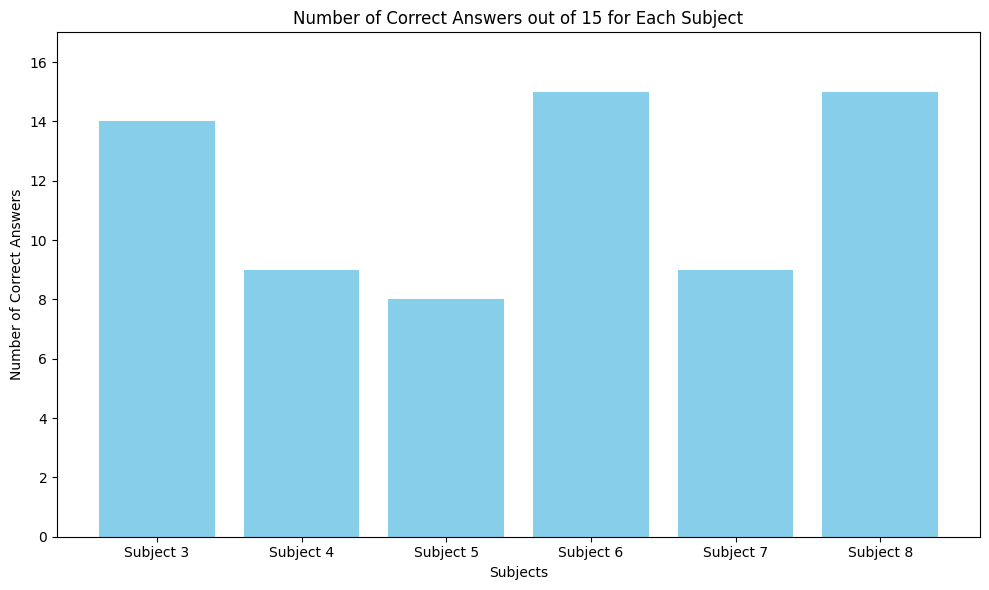

In [37]:
results = {
    'Subject 3': sub3_correct_count,
    'Subject 4': sub4_correct_count,
    'Subject 5': sub5_correct_count,
    'Subject 6': sub6_correct_count, 
    'Subject 7': sub7_correct_count,
    'Subject 8': sub8_correct_count
}

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')

# Add labels and title
plt.xlabel('Subjects')
plt.ylabel('Number of Correct Answers')
plt.title('Number of Correct Answers out of 15 for Each Subject')
plt.ylim(0, 17)  # Set the y-axis limit to 15

# Show the plot
plt.tight_layout()
plt.show()

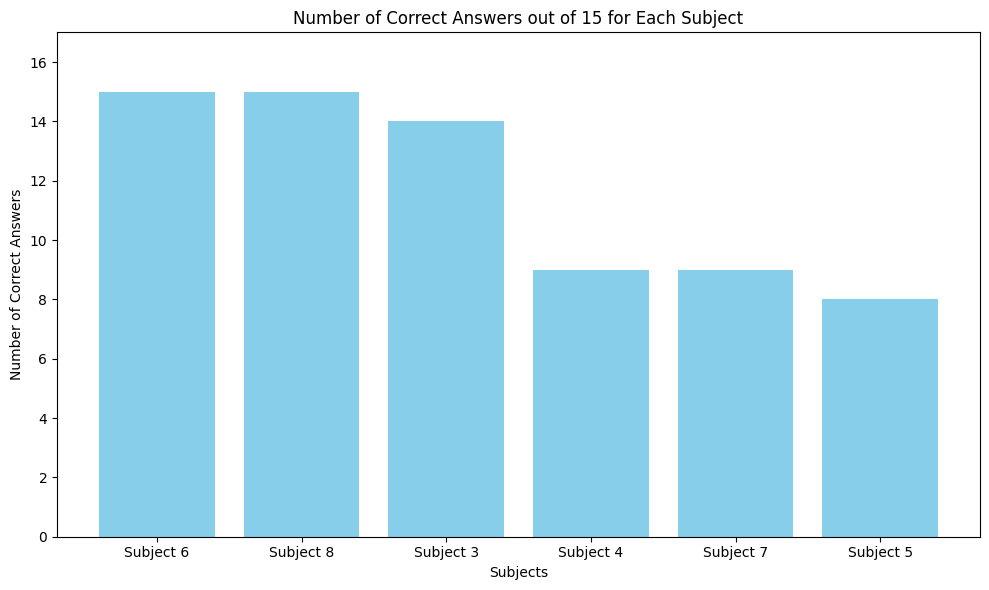

In [38]:
sorted_results = dict(sorted(results.items(), key=lambda item: item[1] , reverse=True))

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(sorted_results.keys(), sorted_results.values(), color='skyblue')

# Add labels and title
plt.xlabel('Subjects')
plt.ylabel('Number of Correct Answers')
plt.title('Number of Correct Answers out of 15 for Each Subject')
plt.ylim(0, 17)  # Set the y-axis limit to 15

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
# Select the relevant columns for correlation analysis
correlation_columns = ['level_int','average_fixation_count', 'average_fixation_time', 'blinkes', 'saccades', 'total_time', 'performance']

# Compute the correlation matrix
correlation_matrix = all_data[correlation_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        level_int  average_fixation_count  \
level_int                1.000000               -0.237196   
average_fixation_count  -0.237196                1.000000   
average_fixation_time   -0.186461                0.887503   
blinkes                  0.081121                0.435046   
saccades                -0.297291                0.289128   
total_time              -0.176248                0.909306   
performance              0.049487               -0.139600   

                        average_fixation_time   blinkes  saccades  total_time  \
level_int                           -0.186461  0.081121 -0.297291   -0.176248   
average_fixation_count               0.887503  0.435046  0.289128    0.909306   
average_fixation_time                1.000000  0.244628  0.352379    0.791192   
blinkes                              0.244628  1.000000  0.099008    0.462578   
saccades                             0.352379  0.099008  1.000000    0.304786   
total

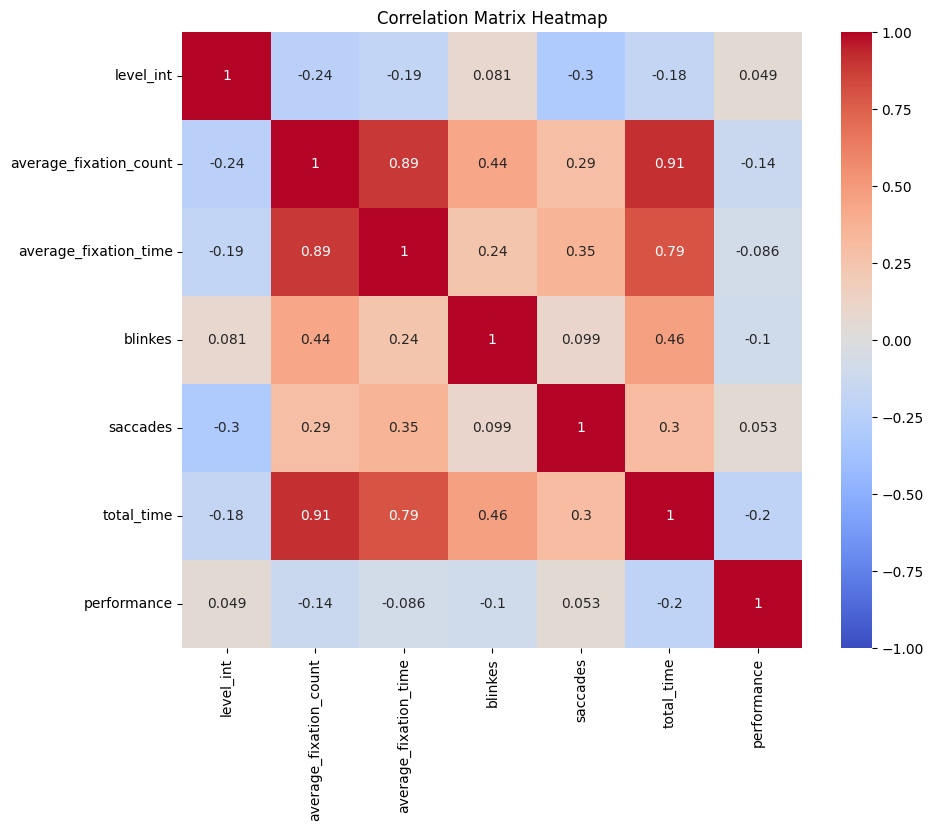

In [41]:

import seaborn as sns

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Prediction

In [42]:
features = ['average_fixation_count', 'average_fixation_time', 'blinkes', 'saccades', 'total_time']
X = all_data[features]
y = all_data['performance']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("train size" , X_train.shape , "Test size " , X_test.shape)

train size (72, 5) Test size  (18, 5)


In [43]:
# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate logistic regression model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.76      0.93      0.84        14

    accuracy                           0.72        18
   macro avg       0.38      0.46      0.42        18
weighted avg       0.59      0.72      0.65        18



In [44]:
# Train decision tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predict on test data
y_pred_tree = tree_clf.predict(X_test)

# Evaluate decision tree model
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.80      0.86      0.83        14

    accuracy                           0.72        18
   macro avg       0.57      0.55      0.56        18
weighted avg       0.70      0.72      0.71        18



In [45]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine
Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.78      1.00      0.88        14

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18



C:\Users\tugak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tugak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tugak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

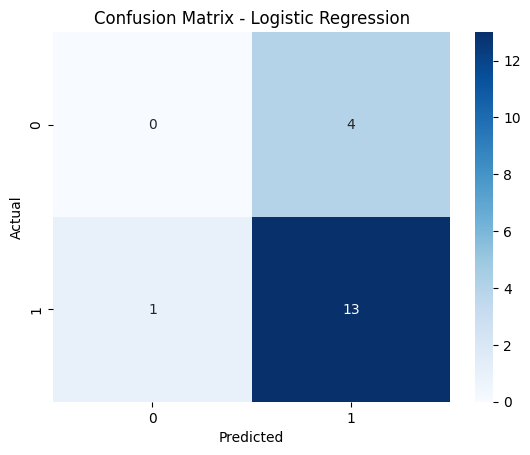

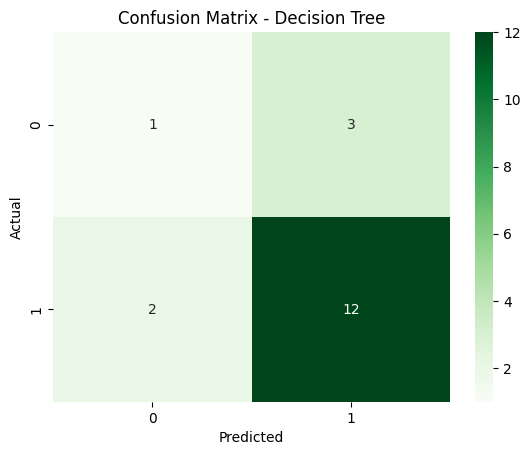

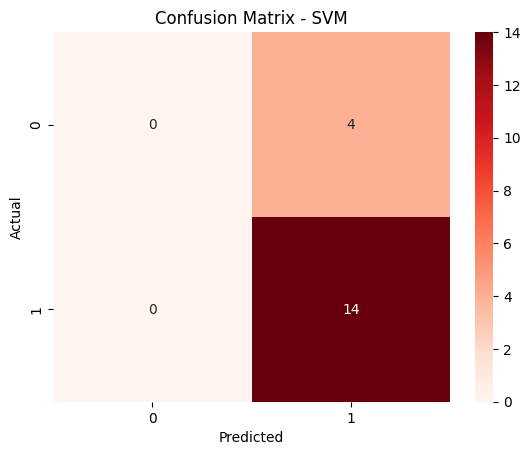

In [46]:
# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Confusion Matrix for Decision Tree
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Conclusion

## * Our analysis did not reveal any significant correlations between the eye-tracking data (fixation counts, fixation times, blinks, saccades) and the subjects' performance. This suggests that these particular metrics may not be strong indicators of success in solving the puzzle levels in our VR game.

## * We observed contradictions between the intended difficulty order of the game levels and the actual performance of the subjects. Specifically, subjects found levels involving subtraction more challenging than anticipated, despite these levels being ranked as less difficult in the mobile version of the game.

## * To obtain more reliable results, a larger dataset is necessary. Additionally, incorporating more features, such as pupil diameter, could provide deeper insights into player behavior and performance.

## * For accurate data labeling, ground truth methods should be employed. This could include the measurement of pupil diameter and the analysis of brain wave activity to better understand cognitive load and engagement during gameplay.